# Упражнения
В этом упражнении рассматривается прогноз SARIMA, аналогичный тому, который был сделан для набора данных $CO_2$.



In [ ]:
# 
import pandas as pd
import numpy as np

# импорт SARIMAX 
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # для определения (p,q) 
from statsmodels.tsa.seasonal import seasonal_decompose      # для ETS графиков
from pmdarima import auto_arima                              # для поиска ARIMA моделей

# метрики
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

import warnings
warnings.filterwarnings("ignore")

# Загрузка датасета

url = 'https://drive.google.com/file/d/1DjQ91cAI5CuCi7Ov7KLOkph-naUhSP5b/view?usp=sharing'

path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

df = pd.read_csv(path)

ulr_2 = 'https://drive.google.com/file/d/1AZkr_20eGJDsGrdx7JW1lYy-NBg8jVZo/view?usp=sharing'
path_2 = 'https://drive.google.com/uc?export=download&id='+ulr_2.split('/')[-2]

df_weekly = pd.read_csv(path_2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       61 non-null     object 
 1   Open       61 non-null     float64
 2   High       61 non-null     float64
 3   Low        61 non-null     float64
 4   Close      61 non-null     float64
 5   Adj Close  61 non-null     float64
 6   Volume     61 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 3.5+ KB


In [ ]:
df['Date'] = df['Date'].astype('datetime64')
df.index = df.Date
df.drop('Date', axis=1, inplace=True)

In [ ]:
df['mean50'] = df['Open'].rolling(window=50).mean()
df['mean5'] = df['Open'].rolling(window=5).mean()


In [ ]:
df = df.drop('Volume', axis=1)


In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
df.shape

(61, 7)

In [ ]:
df_weekly

,Open,High,Low,Close,Adj Close,mean50,mean5
Date,,,,,,,
2016-12-05,220.649994,226.529999,220.419998,226.509995,206.819183,NaN,NaN
2016-12-12,226.399994,228.339996,224.669998,225.039993,205.476959,NaN,NaN
2016-12-19,225.250000,226.570007,224.919998,225.710007,207.303436,NaN,NaN
2016-12-26,226.020004,226.729996,222.729996,223.529999,205.301208,NaN,NaN
2017-01-02,225.039993,227.750000,223.880005,227.210007,208.681137,NaN,224.671997
...,...,...,...,...,...,...,...
2021-11-08,469.700012,470.230011,462.040009,467.269989,467.269989,414.344799,453.082001
2021-11-15,468.640015,470.940002,466.230011,468.890015,468.890015,416.461000,459.378003
2021-11-22,470.890015,473.540009,457.769989,458.970001,458.970001,418.498400,464.762006


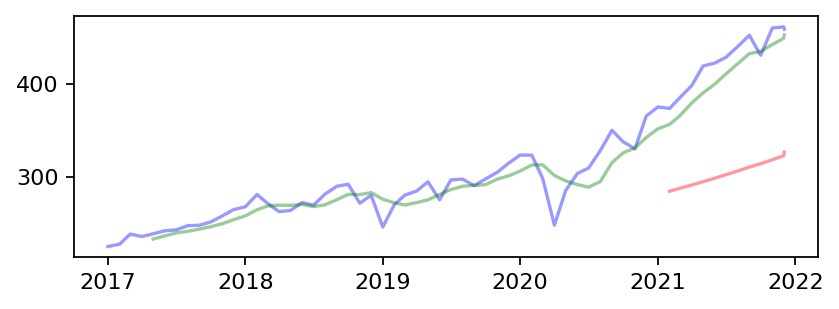

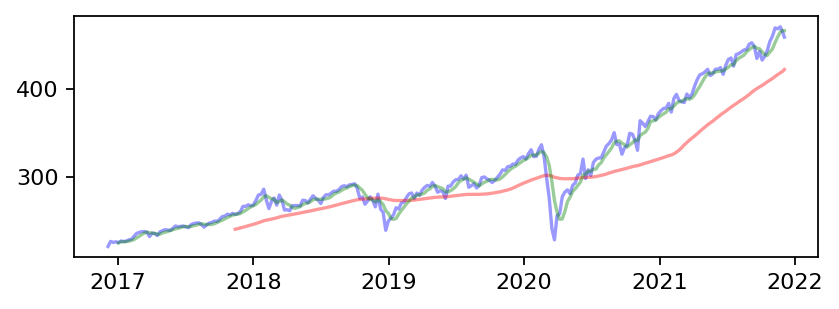

In [ ]:
plt.figure(figsize=(6,2), dpi=160)
plt.plot(df.Open, color='blue',alpha=0.4)
plt.plot(df.mean50, color='red',alpha=0.4)
plt.plot(df.mean5, color='green',alpha=0.4)
plt.show()

plt.figure(figsize=(6,2), dpi=160)
plt.plot(df_weekly.Open, color='blue',alpha=0.4)
plt.plot(df_weekly.mean50, color='red',alpha=0.4)
plt.plot(df_weekly.mean5, color='green',alpha=0.4)
plt.show()

In [ ]:
df.corr()

,Open,High,Low,Close,Adj Close,mean50,mean5
Open,1.000000,0.991642,0.980111,0.977259,0.977879,0.937121,0.978040
High,0.991642,1.000000,0.976453,0.987362,0.989907,0.938541,0.984003
Low,0.980111,0.976453,1.000000,0.989701,0.986744,0.938668,0.953418
Close,0.977259,0.987362,0.989701,1.000000,0.999374,0.887534,0.966885
Adj Close,0.977879,0.989907,0.986744,0.999374,1.000000,0.894891,0.969777
mean50,0.937121,0.938541,0.938668,0.887534,0.894891,1.000000,0.984976
mean5,0.978040,0.984003,0.953418,0.966885,0.969777,0.984976,1.000000


In [ ]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['Open'])

In [ ]:
# p-value = 1
dftest[1]

0.9649803685411921

In [ ]:
# p-value = 0.01, 0.05, 0.1

In [ ]:
df

,Open,High,Low,Close,Adj Close,mean50,mean5
Date,,,,,,,
2017-01-01,225.039993,229.710007,223.880005,227.529999,208.975021,NaN,NaN
2017-02-01,227.529999,237.309998,226.820007,236.470001,217.185944,NaN,NaN
2017-03-01,238.389999,240.320007,231.610001,235.740005,216.515503,NaN,NaN
2017-04-01,235.800003,239.529999,232.509995,238.080002,219.615967,NaN,NaN
2017-05-01,238.679993,242.080002,235.429993,241.440002,222.715408,NaN,233.087997
...,...,...,...,...,...,...,...
2021-09-01,452.559998,454.049988,428.779999,429.140015,427.769592,310.549600,432.753998
2021-10-01,430.980011,459.559998,426.359985,459.250000,459.250000,314.220001,435.064001
2021-11-01,460.299988,473.540009,455.299988,455.559998,455.559998,318.467600,442.609998


In [ ]:
df = df[0: - 1]

In [ ]:
df

,Open,High,Low,Close,Adj Close,mean50,mean5
Date,,,,,,,
2017-01-01,225.039993,229.710007,223.880005,227.529999,208.975021,NaN,NaN
2017-02-01,227.529999,237.309998,226.820007,236.470001,217.185944,NaN,NaN
2017-03-01,238.389999,240.320007,231.610001,235.740005,216.515503,NaN,NaN
2017-04-01,235.800003,239.529999,232.509995,238.080002,219.615967,NaN,NaN
2017-05-01,238.679993,242.080002,235.429993,241.440002,222.715408,NaN,233.087997
2017-06-01,241.970001,245.009995,239.960007,241.800003,223.047455,NaN,236.473999
2017-07-01,242.880005,248.000000,240.339996,246.770004,228.742081,NaN,239.544000
2017-08-01,247.460007,248.910004,241.830002,247.490005,229.409500,NaN,241.358002
2017-09-01,247.919998,251.320007,244.949997,251.229996,232.876251,NaN,243.782001


In [ ]:
df_weekly

,Open,High,Low,Close,Adj Close,mean50,mean5
Date,,,,,,,
2016-12-05,220.649994,226.529999,220.419998,226.509995,206.819183,NaN,NaN
2016-12-12,226.399994,228.339996,224.669998,225.039993,205.476959,NaN,NaN
2016-12-19,225.250000,226.570007,224.919998,225.710007,207.303436,NaN,NaN
2016-12-26,226.020004,226.729996,222.729996,223.529999,205.301208,NaN,NaN
2017-01-02,225.039993,227.750000,223.880005,227.210007,208.681137,NaN,224.671997
...,...,...,...,...,...,...,...
2021-11-08,469.700012,470.230011,462.040009,467.269989,467.269989,414.344799,453.082001
2021-11-15,468.640015,470.940002,466.230011,468.890015,468.890015,416.461000,459.378003
2021-11-22,470.890015,473.540009,457.769989,458.970001,458.970001,418.498400,464.762006


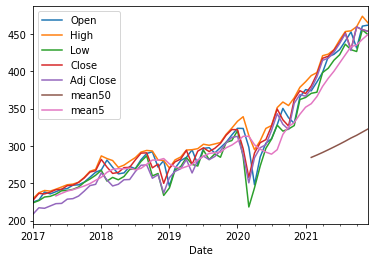

In [ ]:
df.plot()

In [ ]:
df.index.freq = 'MS'

r = seasonal_decompose(df['Open'])

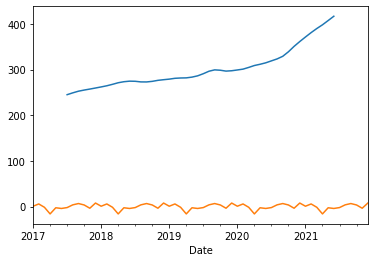

In [ ]:
r.trend.plot()
r.seasonal.plot()

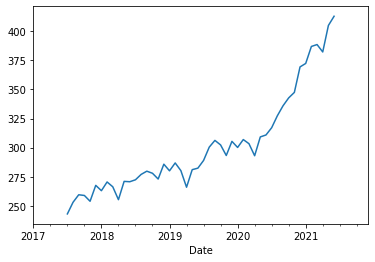

In [ ]:
(r.trend + r.seasonal).plot()

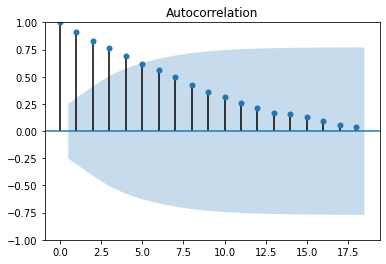

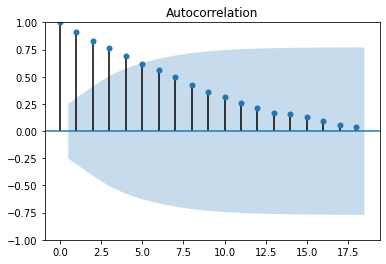

In [ ]:
plot_acf(df['Open'])

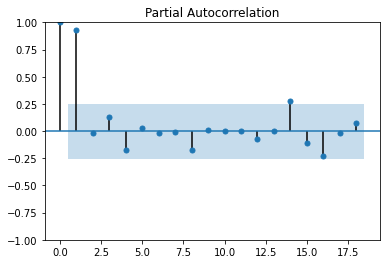

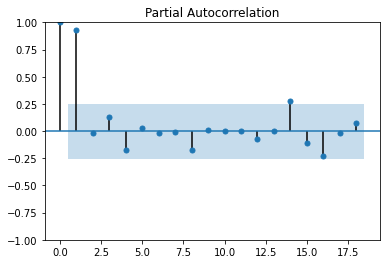

In [ ]:
plot_pacf(df['Open'])

In [ ]:
# AR

from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(df['Open'], 1).fit()

print(model.aic, model.hqic, model.bic)


yhat = model.predict(len(df['Open']), len(df['Open']) + 1)

yhat

493.2200208440969 495.65298027525057 499.45263317581407


2022-01-01    466.774168
2022-02-01    471.945458
Freq: MS, dtype: float64

In [ ]:
yhat

2022-01-01    466.774168
2022-02-01    471.945458
Freq: MS, dtype: float64

In [ ]:
auto_arima(df['Open']).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -243.636
Date:                Sun, 05 Dec 2021   AIC                            491.272
Time:                        07:25:30   BIC                            495.427
Sample:                             0   HQIC                           492.894
                                 - 60                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.0102      2.168      1.850      0.064      -0.239       8.259
sigma2       226.0992     31.450      7.189      0.000     164.458     287.740
===================================================================================
Ljung-Box (L1) (Q):                   1.15   Jarque-Bera (JB):                20.77
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):               7.10   Skew:                            -0.89
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model = SARIMAX(df['Open'],order=(1, 1, 1),seasonal_order=(0, 0, 0, 0))

In [ ]:
model_fit = model.fit()

predictions = model_fit.predict(start='2021-01-01', end='2022-05-01', dynamic=False, typ='levels', )

In [ ]:
predictions.head()

2021-01-01    363.309461
2021-02-01    373.981184
2021-03-01    373.442595
2021-04-01    384.691913
2021-05-01    397.256475
Freq: MS, Name: predicted_mean, dtype: float64

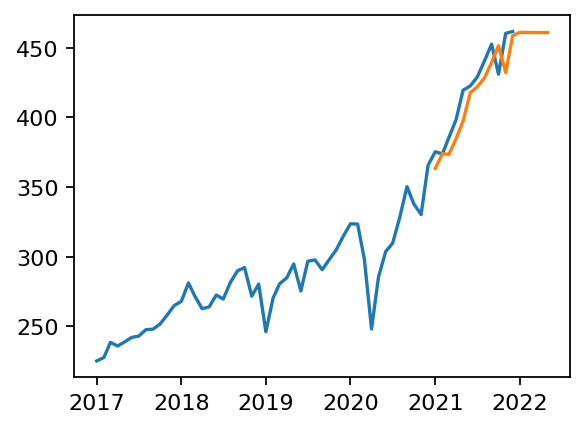

In [ ]:
plt.figure(figsize=(4,3), dpi=160)
# df['Open'].plot()
# predictions.plot()

plt.plot(df['Open'])
plt.plot(predictions)
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model_arima = ARIMA(df['Open'], order=(0,1,0)).fit()

In [ ]:
df_weekly = df_weekly[0:-1]

In [ ]:
df_weekly.index.freq = 'W'

ValueError: ignored

In [ ]:
df_weekly

,Open,High,Low,Close,Adj Close,mean50,mean5
Date,,,,,,,
2016-12-05,220.649994,226.529999,220.419998,226.509995,206.819183,NaN,NaN
2016-12-12,226.399994,228.339996,224.669998,225.039993,205.476959,NaN,NaN
2016-12-19,225.250000,226.570007,224.919998,225.710007,207.303436,NaN,NaN
2016-12-26,226.020004,226.729996,222.729996,223.529999,205.301208,NaN,NaN
2017-01-02,225.039993,227.750000,223.880005,227.210007,208.681137,NaN,224.671997
...,...,...,...,...,...,...,...
2021-11-01,460.299988,470.649994,458.200012,468.529999,468.529999,412.096399,445.741998
2021-11-08,469.700012,470.230011,462.040009,467.269989,467.269989,414.344799,453.082001
2021-11-15,468.640015,470.940002,466.230011,468.890015,468.890015,416.461000,459.378003
